<a id='section_id3'></a>
# Auswertung der Simulationsdaten und Visualisierung der Kennwerte in Diagrammen

In [1]:
from parameter_base_case import *
#from parameter_best_case import *
#from parameter_worst_case import *

## Standardvergleich über Kennwerte

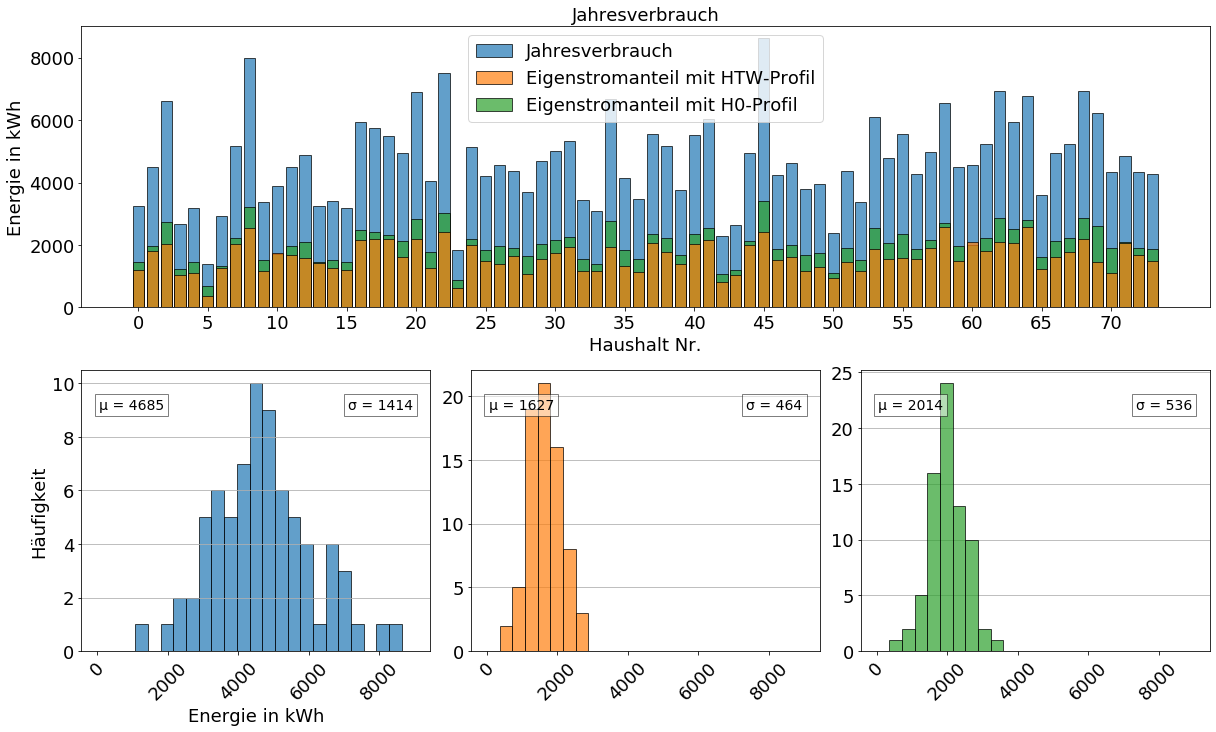

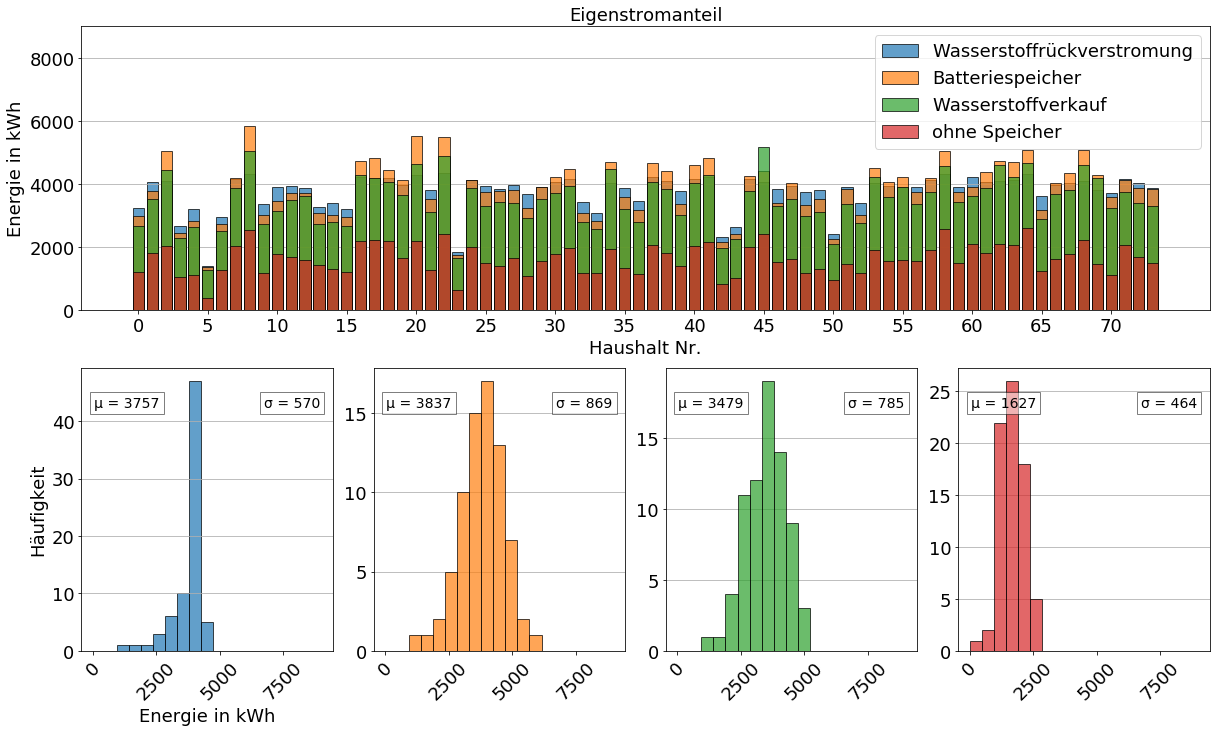

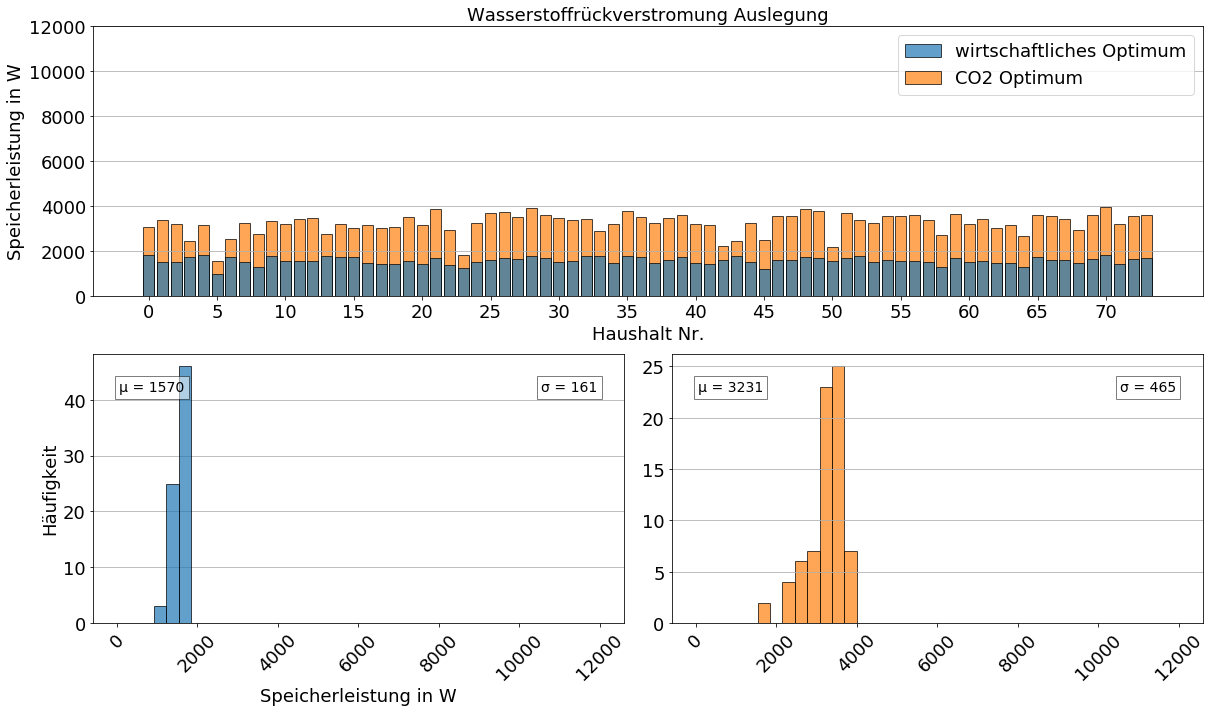

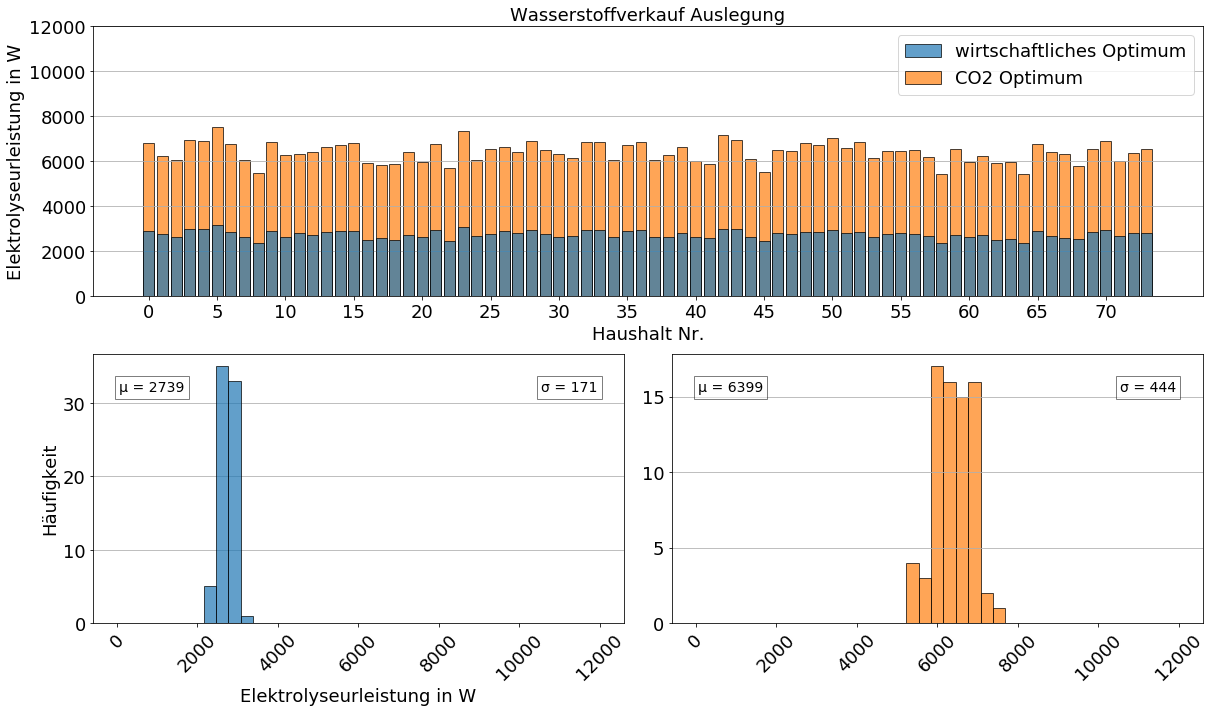

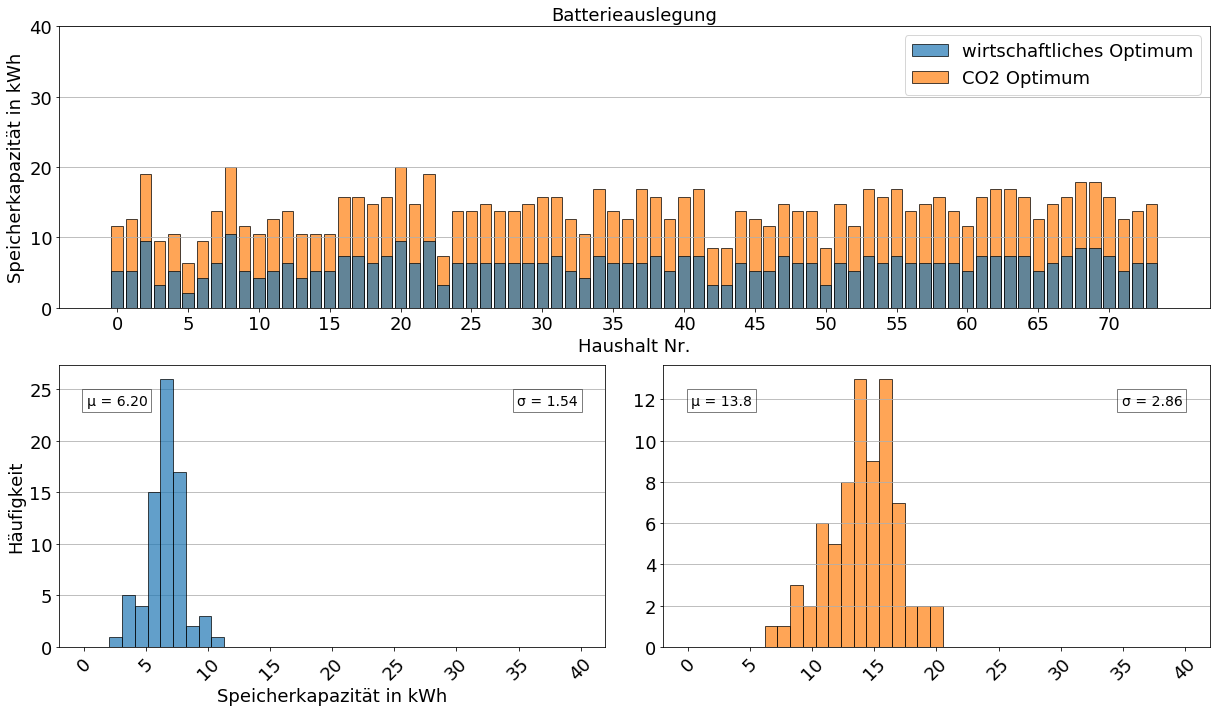

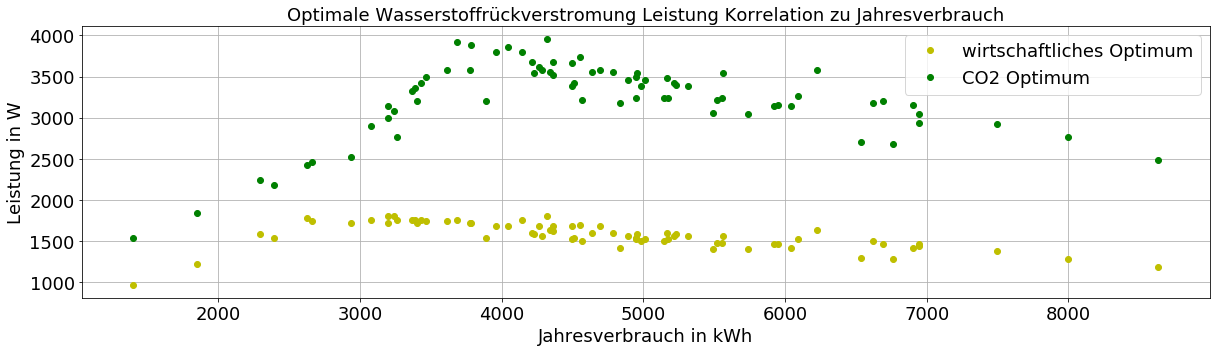

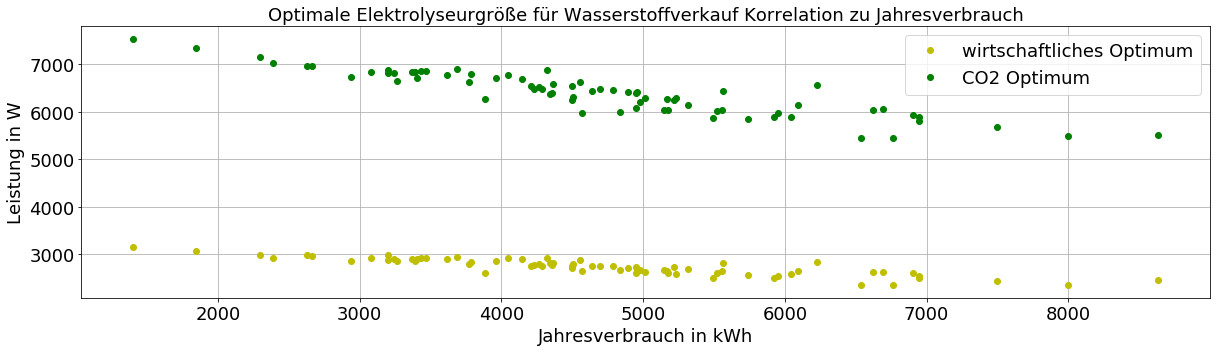

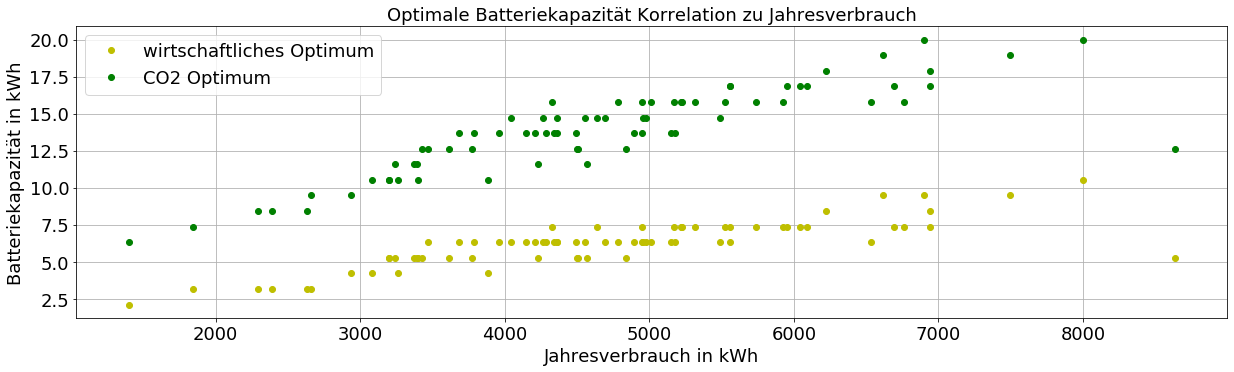

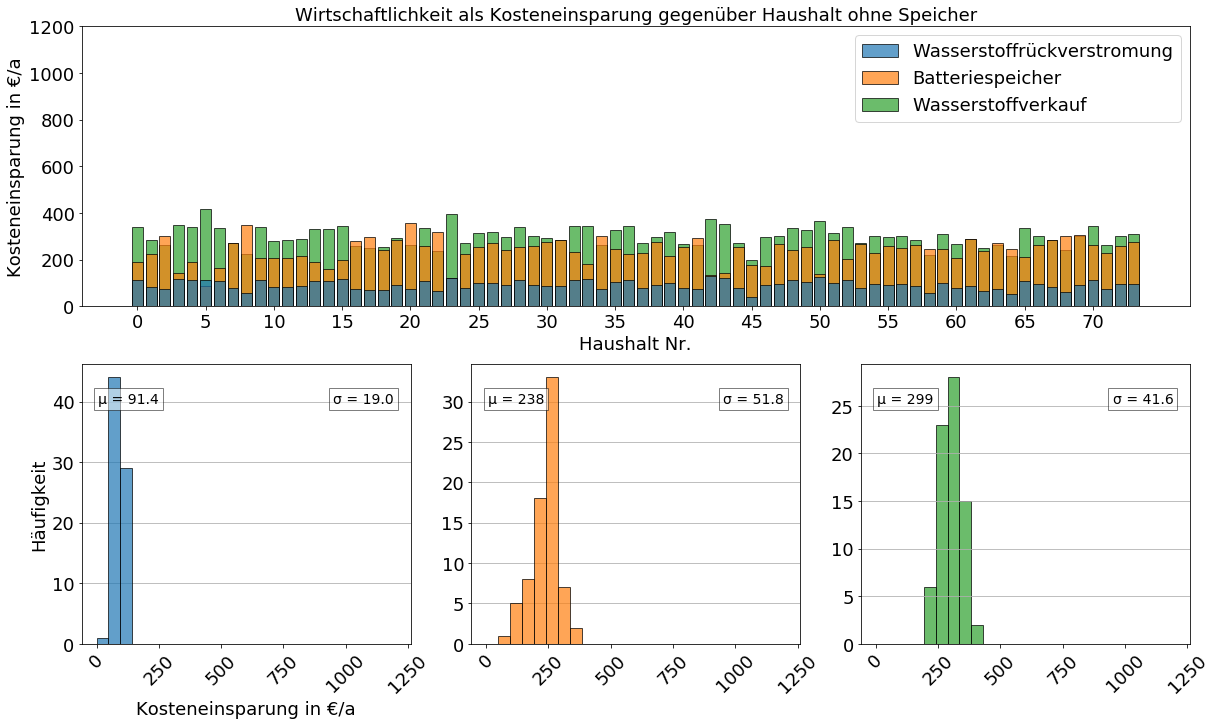

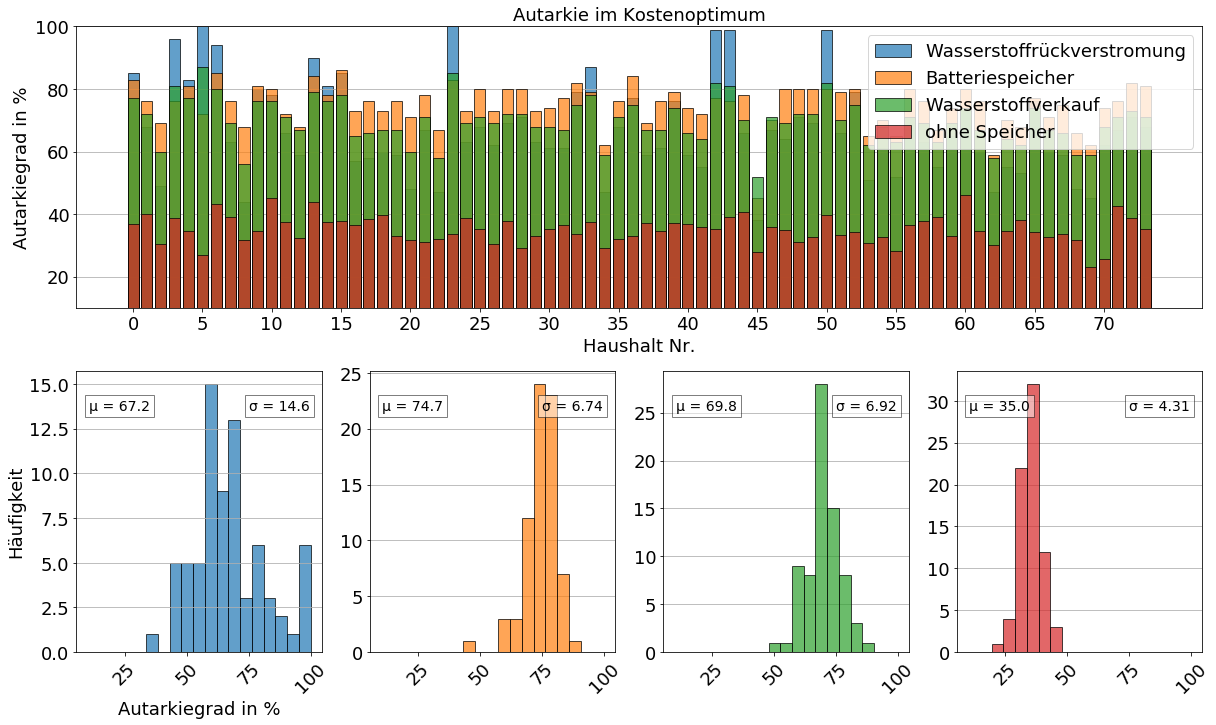

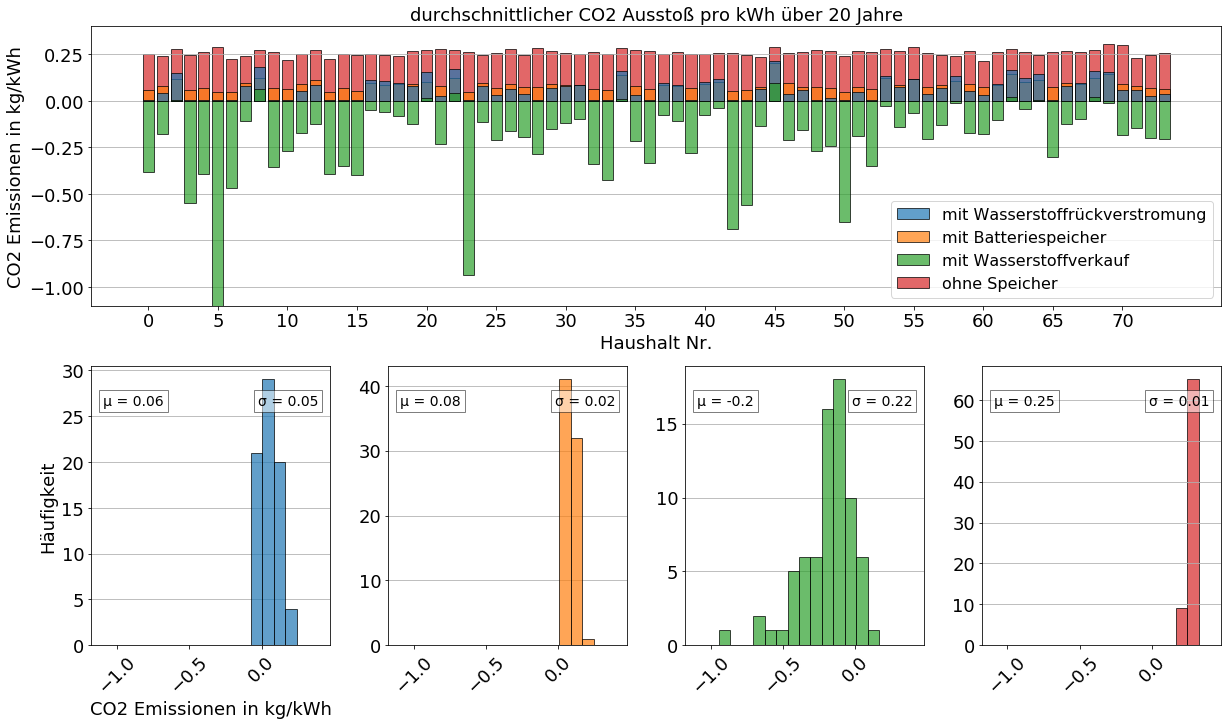

In [2]:
# Load
version=""""""
read_dictionary = np.load(directory_data+'simulation_'+file_extension+'_mode0.npy',allow_pickle='TRUE').item()

E_netz_jahr_list=read_dictionary['E_netz_jahr']
E_eigen_ohne_jahr_list=read_dictionary['E_eigen_ohne_jahr']
E_eigen_ohne_H0_jahr_list=read_dictionary['E_eigen_ohne_H0_jahr']
P_max_RFC_kosten_opt_list=read_dictionary['P_max_RFC_kosten_opt']
P_max_P2G_kosten_opt_list=read_dictionary['P_max_P2G_kosten_opt']
E_max_bat_kosten_opt_list=read_dictionary['E_max_bat_kosten_opt']
P_max_RFC_CO2_opt_list=read_dictionary['P_max_RFC_CO2_opt']
P_max_P2G_CO2_opt_list=read_dictionary['P_max_P2G_CO2_opt']
E_max_bat_CO2_opt_list=read_dictionary['E_max_bat_CO2_opt']
autarkie_RFC_kosten_opt_list=read_dictionary['autarkie_RFC_kosten_opt']
autarkie_P2G_kosten_opt_list=read_dictionary['autarkie_P2G_kosten_opt']
autarkie_bat_kosten_opt_list=read_dictionary['autarkie_bat_kosten_opt']
autarkie_RFC_CO2_opt_list=read_dictionary['autarkie_RFC_CO2_opt']
autarkie_P2G_CO2_opt_list=read_dictionary['autarkie_P2G_CO2_opt']
autarkie_bat_CO2_opt_list=read_dictionary['autarkie_bat_CO2_opt']
K_einspar_RFC_list=read_dictionary['K_einspar_RFC']
K_einspar_P2G_list=read_dictionary['K_einspar_P2G']
K_einspar_bat_list=read_dictionary['K_einspar_bat']
CO2prokWh_RFC_list=read_dictionary['CO2prokWh_RFC']
CO2prokWh_P2G_list=read_dictionary['CO2prokWh_P2G']
CO2prokWh_bat_list=read_dictionary['CO2prokWh_bat']
CO2prokWh_ohne_list=read_dictionary['CO2prokWh_ohne']
LastprofilNr=read_dictionary['LastprofilNr']

path = directory_output+'/Simulation_Standardvergleich_Kennwerte/'+version


#Jahresverbrauch
E_jahresverbrauch=np.add(E_netz_jahr_list, E_eigen_ohne_jahr_list)
title= 'Jahresverbrauch'
lim=[0,9000]
ax=vis.balkendiagramm(LastprofilNr,[E_jahresverbrauch,E_eigen_ohne_jahr_list,E_eigen_ohne_H0_jahr_list],lim,'Haushalt Nr.','Energie in kWh','')
ax.legend(['Jahresverbrauch','Eigenstromanteil mit HTW-Profil','Eigenstromanteil mit H0-Profil'],loc='best', fontsize=vis.fontsize)
plt.tight_layout()
vis.save_to_tex('Diagramm_Jahresverbrauch_vergleichH0'+file_extension,ax)
ax.set_title(title,fontsize=vis.fontsize)
plt.savefig(path+'Jahresverbrauch_'+file_extension+'.png')

#Eigenstromanteil
E_jahresverbrauch=np.add(E_netz_jahr_list, E_eigen_ohne_jahr_list)
title= 'Eigenstromanteil'
lim=[0,9000]
ax=vis.balkendiagramm(LastprofilNr,[E_jahresverbrauch*autarkie_RFC_CO2_opt_list/100,\
E_jahresverbrauch*autarkie_bat_CO2_opt_list/100,E_jahresverbrauch*autarkie_P2G_CO2_opt_list/100,E_eigen_ohne_jahr_list],lim,'Haushalt Nr.','Energie in kWh','')
ax.legend(['Wasserstoffrückverstromung','Batteriespeicher','Wasserstoffverkauf','ohne Speicher'],loc='best', fontsize=vis.fontsize)
plt.tight_layout()
vis.save_to_tex('Diagramm_Eigenstromanteil_vergleichSpeicher'+file_extension,ax)
ax.set_title(title,fontsize=vis.fontsize)
plt.savefig(path+'Eigenstromanteil_'+file_extension+'.png')

#Optimalauslegung Wasserstoffrückverstromung
lim=[0,12000]
title='Wasserstoffrückverstromung Auslegung'
ax=vis.balkendiagramm(LastprofilNr,[P_max_RFC_kosten_opt_list,P_max_RFC_CO2_opt_list],lim,'Haushalt Nr.','Speicherleistung in W', title)
ax.legend(['wirtschaftliches Optimum','CO2 Optimum'],loc='best', fontsize=vis.fontsize)
plt.savefig(path+'Optimalauslegung_Wasserstoffrückverstromung_'+file_extension+'.png')
#Optimalauslegung Wasserstoffverkauf
lim=[0,12000]
title='Wasserstoffverkauf Auslegung'
ax=vis.balkendiagramm(LastprofilNr,[P_max_P2G_kosten_opt_list,P_max_P2G_CO2_opt_list],lim,'Haushalt Nr.','Elektrolyseurleistung in W', title)
ax.legend(['wirtschaftliches Optimum','CO2 Optimum'],loc='best', fontsize=vis.fontsize)
plt.savefig(path+'Optimalauslegung_Wasserstoffverkauf_'+file_extension+'.png')
#Optimalauslegung Batterie
lim=[0,40]
title='Batterieauslegung'
ax=vis.balkendiagramm(LastprofilNr,[E_max_bat_kosten_opt_list,E_max_bat_CO2_opt_list],lim,'Haushalt Nr.','Speicherkapazität in kWh',title)
ax.legend(['wirtschaftliches Optimum','CO2 Optimum'],loc='best', fontsize=vis.fontsize)
#ax.set_ylim(0]
plt.savefig(path+'Optimalauslegung_Batterie_'+file_extension+'.png')


#Korrelation Wasserstoffrückverstromung
title='Optimale Wasserstoffrückverstromung Leistung Korrelation zu Jahresverbrauch'
ax=vis.plot_korrelation(E_jahresverbrauch,P_max_RFC_kosten_opt_list,'Jahresverbrauch in kWh','Leistung in W','')
ax.plot(E_jahresverbrauch,P_max_RFC_CO2_opt_list,'go')
ax.legend(['wirtschaftliches Optimum','CO2 Optimum'],loc='best', fontsize=vis.fontsize)
ax.set_title(title,fontsize=vis.fontsize)
plt.savefig(path+'Korrelation_Wasserstoffrückverstromung_'+file_extension+'.png')
plt.tight_layout()
vis.save_to_tex('Diagramm_Korrelation_RFC_oekologischeAuslegung_'+file_extension,ax)
#Korrelation Wasserstoffverkauf
title='Optimale Elektrolyseurgröße für Wasserstoffverkauf Korrelation zu Jahresverbrauch'
ax=vis.plot_korrelation(E_jahresverbrauch,P_max_P2G_kosten_opt_list,'Jahresverbrauch in kWh','Leistung in W','')
ax.plot(E_jahresverbrauch,P_max_P2G_CO2_opt_list,'go')
ax.legend(['wirtschaftliches Optimum','CO2 Optimum'],loc='best', fontsize=vis.fontsize)
ax.set_title(title,fontsize=vis.fontsize)
plt.savefig(path+'Korrelation_Wasserstoffverkauf_'+file_extension+'.png')
plt.tight_layout()
vis.save_to_tex('Diagramm_Korrelation_P2G_oekologischeAuslegung_'+file_extension,ax)
#Korrelation Batterie
title='Optimale Batteriekapazität Korrelation zu Jahresverbrauch'
ax=vis.plot_korrelation(E_jahresverbrauch,E_max_bat_kosten_opt_list,'Jahresverbrauch in kWh','Batteriekapazität in kWh','')
ax.plot(E_jahresverbrauch,E_max_bat_CO2_opt_list,'go')
ax.legend(['wirtschaftliches Optimum','CO2 Optimum'],loc='best', fontsize=vis.fontsize)
ax.set_title(title,fontsize=vis.fontsize)
plt.savefig(path+'Korrelation_Batterie_'+file_extension+'.png')
vis.save_to_tex('Diagramm_Korrelation_Batterie_oekologischeAuslegung_'+file_extension,ax)

#Wirtschaftlichkeit Vergleich
lim=[0,1200]
title='Wirtschaftlichkeit als Kosteneinsparung gegenüber Haushalt ohne Speicher'
ax=vis.balkendiagramm(LastprofilNr,[K_einspar_RFC_list,K_einspar_bat_list,K_einspar_P2G_list],lim,'Haushalt Nr.','Kosteneinsparung in €/a','')
ax.legend(['Wasserstoffrückverstromung','Batteriespeicher','Wasserstoffverkauf'],loc='best', fontsize=vis.fontsize)
plt.tight_layout()
vis.save_to_tex('Diagramm_Wirtschaftlichkeit_vergleichSpeicher_'+file_extension,ax)
ax.set_title(title,fontsize=vis.fontsize)
plt.savefig(path+'Wirtschaftlichkeit_Vergleich_'+file_extension+'ynorm.png')

#Autarkiegrad
title='Autarkie im Kostenoptimum'
lim=[10,100]
autarkie_ohne_speicher=100*np.array(E_eigen_ohne_jahr_list)/E_jahresverbrauch
ax=vis.balkendiagramm(LastprofilNr,[autarkie_RFC_kosten_opt_list,autarkie_bat_kosten_opt_list,autarkie_P2G_kosten_opt_list,autarkie_ohne_speicher],lim,'Haushalt Nr.','Autarkiegrad in %','')
ax.legend(['Wasserstoffrückverstromung','Batteriespeicher','Wasserstoffverkauf','ohne Speicher'],loc='best', fontsize=vis.fontsize)
plt.tight_layout()
vis.save_to_tex('Diagramm_Autarkiegrad_vergleichSpeicher_'+file_extension,ax)
ax.set_title(title,fontsize=vis.fontsize)
plt.savefig(path+'Autarkiegrad_'+file_extension+'.png')

#Umwelteinfluss
title= 'durchschnittlicher CO2 Ausstoß pro kWh über 20 Jahre'
lim=[-1.1,0.4]
ax=vis.balkendiagramm(LastprofilNr,[CO2prokWh_RFC_list,CO2prokWh_bat_list,CO2prokWh_P2G_list,CO2prokWh_ohne_list],lim,'Haushalt Nr.', 'CO2 Emissionen in kg/kWh','')
ax.legend(['mit Wasserstoffrückverstromung','mit Batteriespeicher','mit Wasserstoffverkauf','ohne Speicher'],loc='lower right', fontsize=vis.fontsize-2)
plt.tight_layout()
vis.save_to_tex('Diagramm_Umwelteinfluss_vergleichSpeicher_'+file_extension,ax)
ax.set_title(title,fontsize=vis.fontsize)
plt.savefig(path+'CO2_prokWh_'+file_extension+'.png')


## Zentrales System für mehrere Haushalte

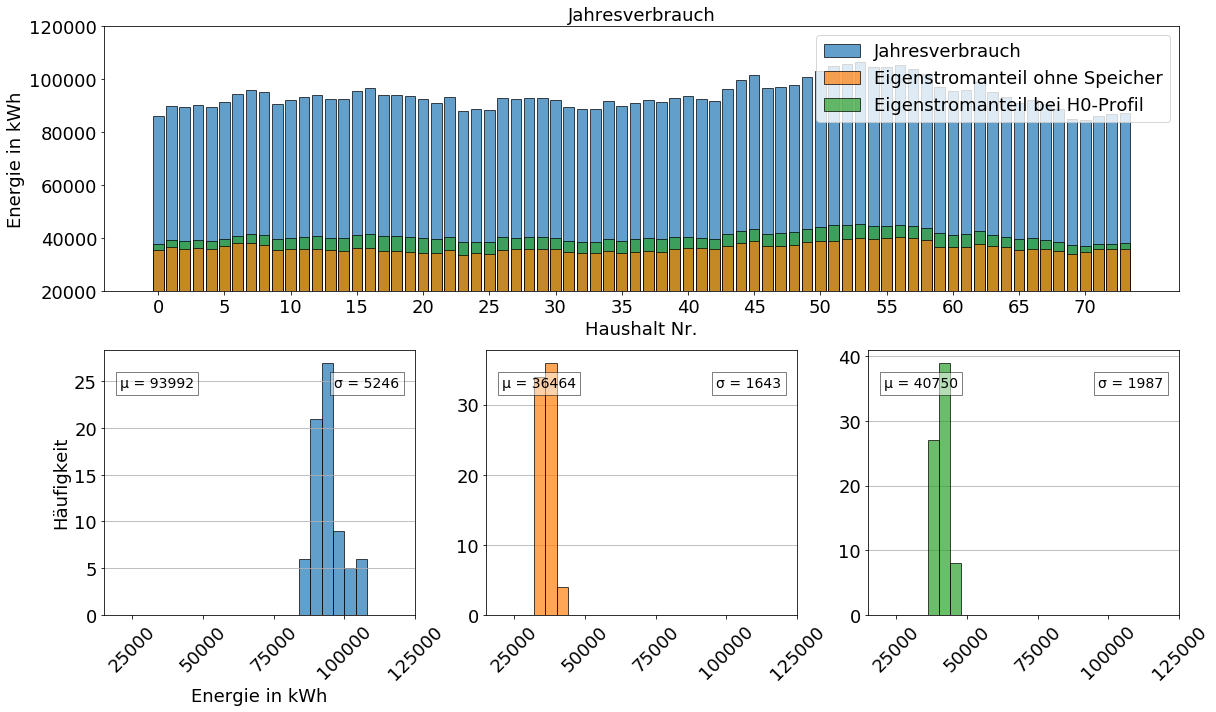

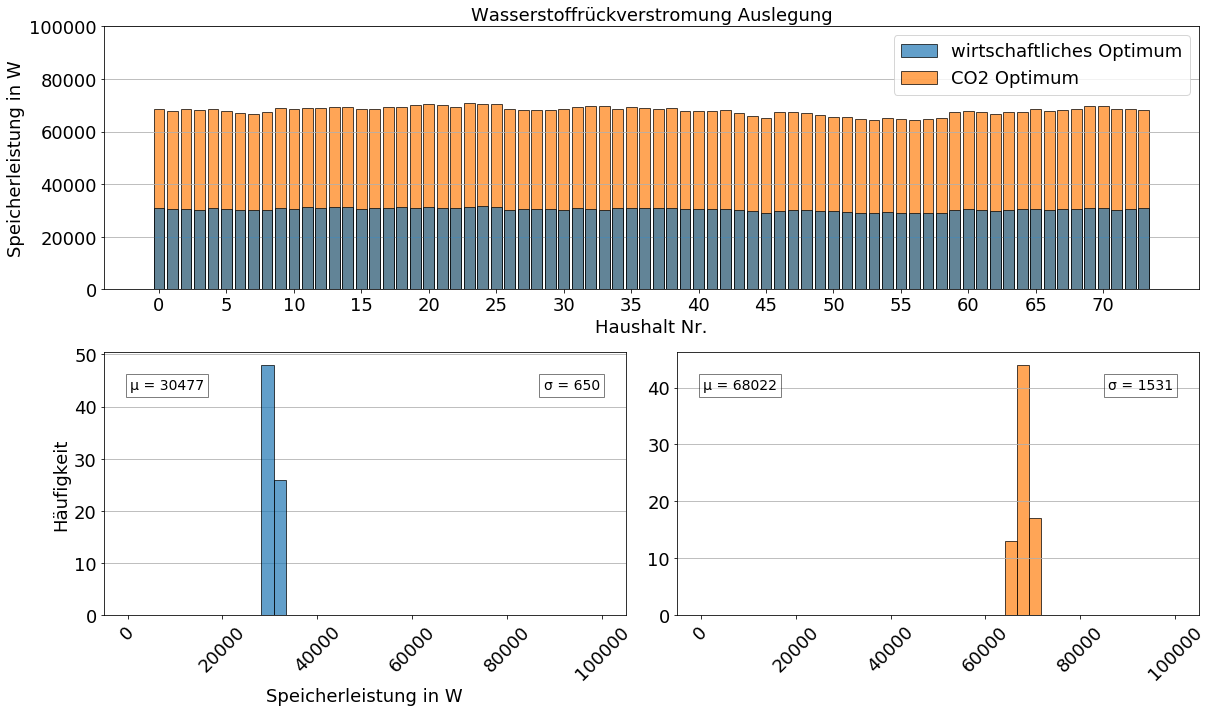

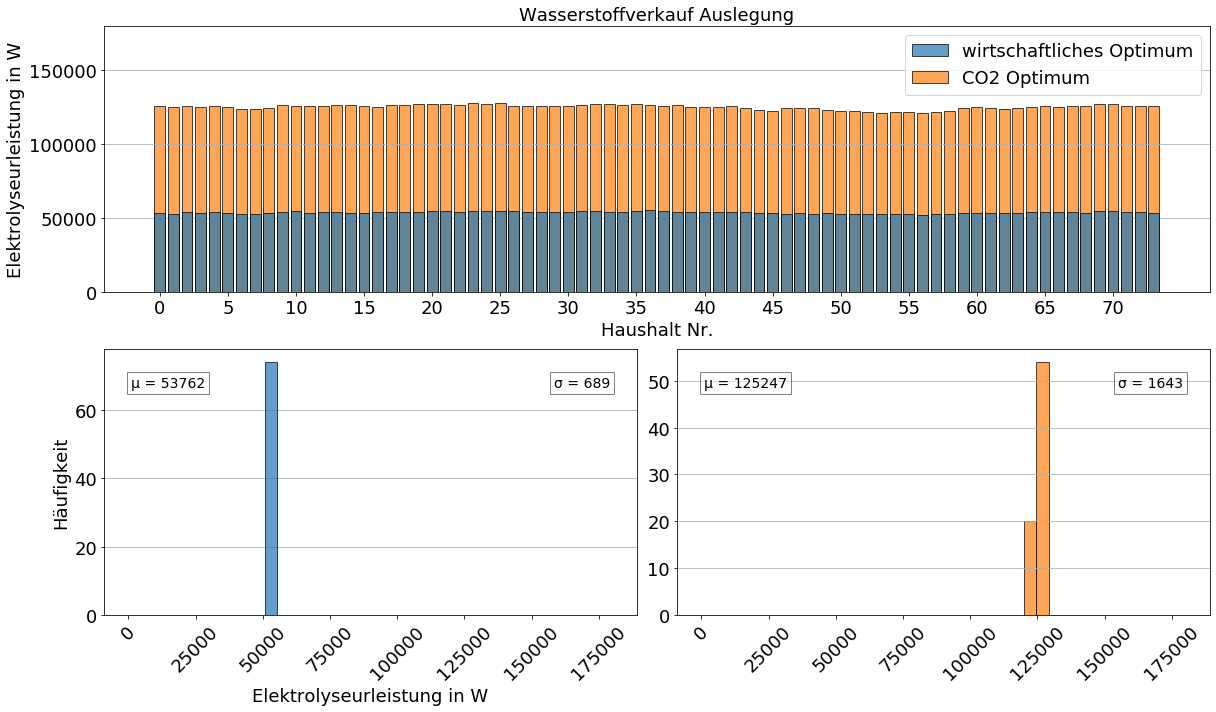

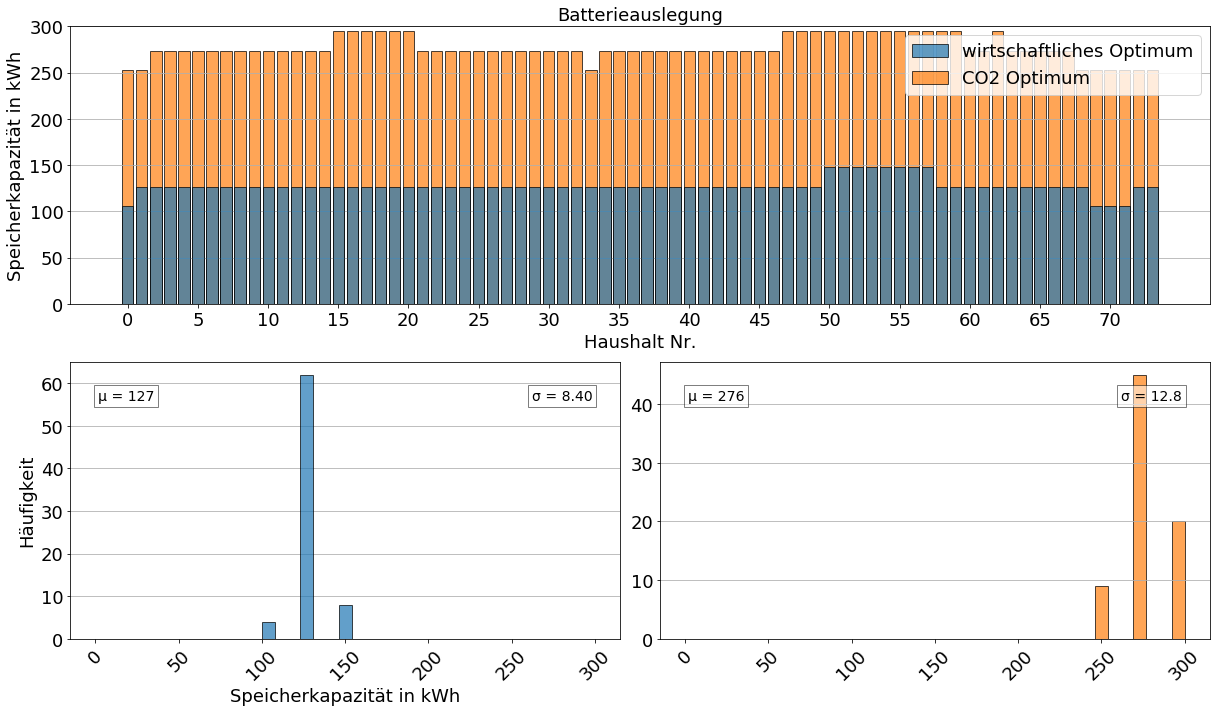

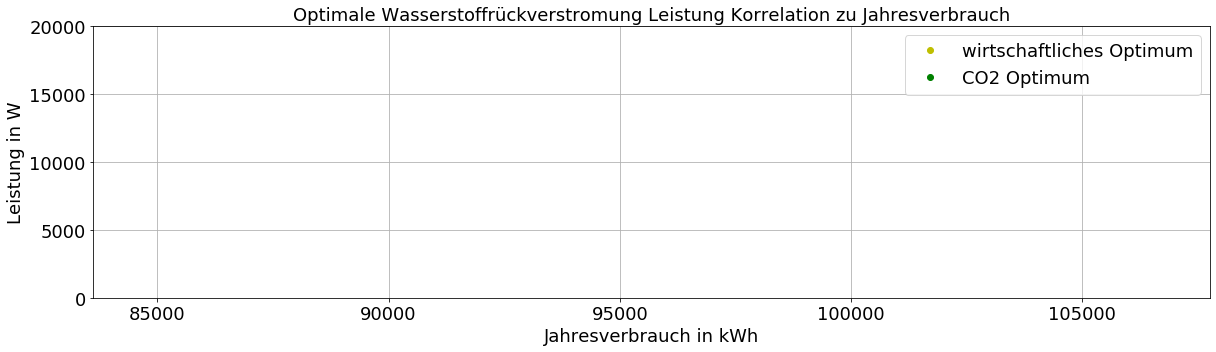

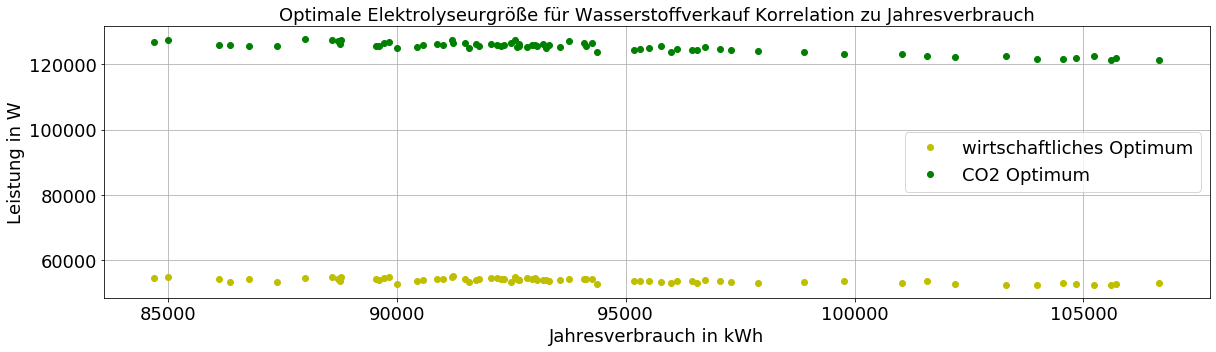

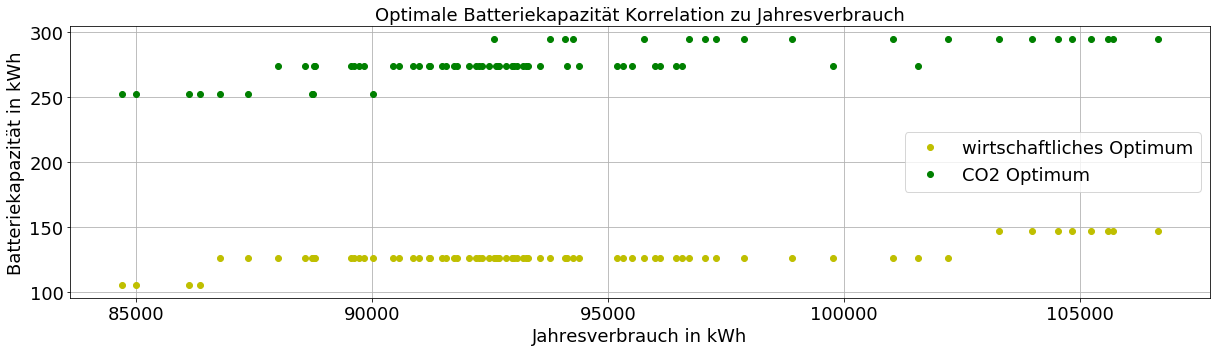

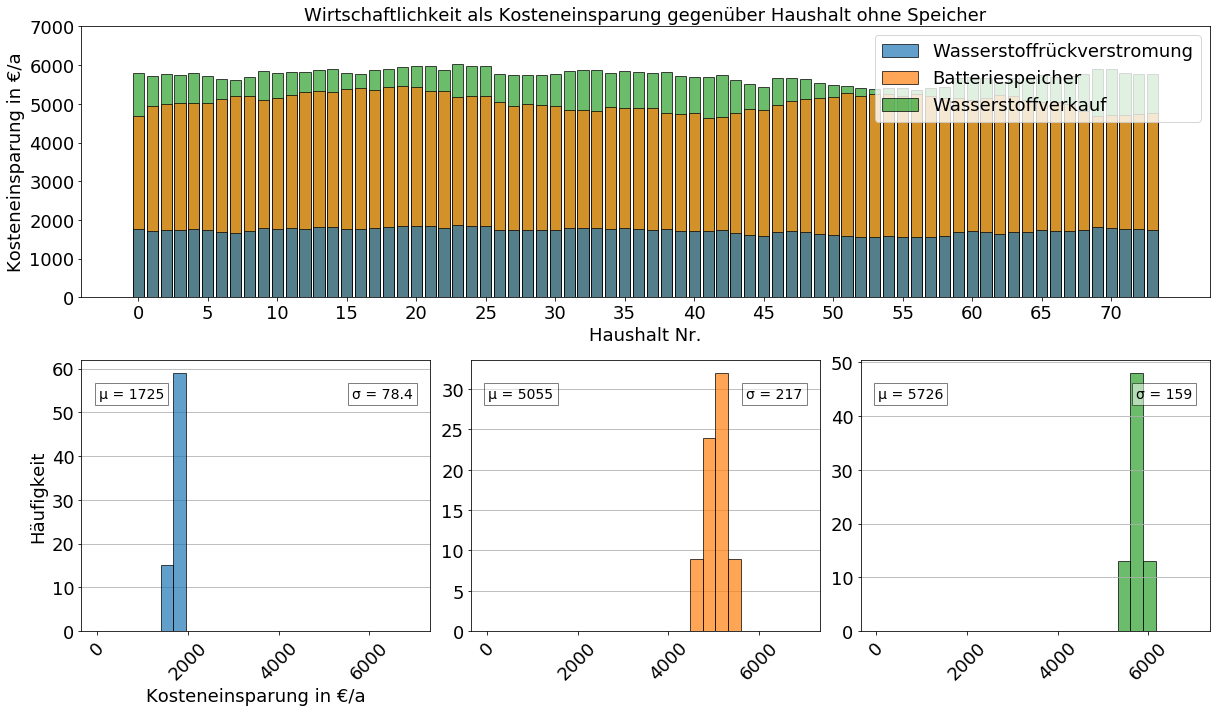

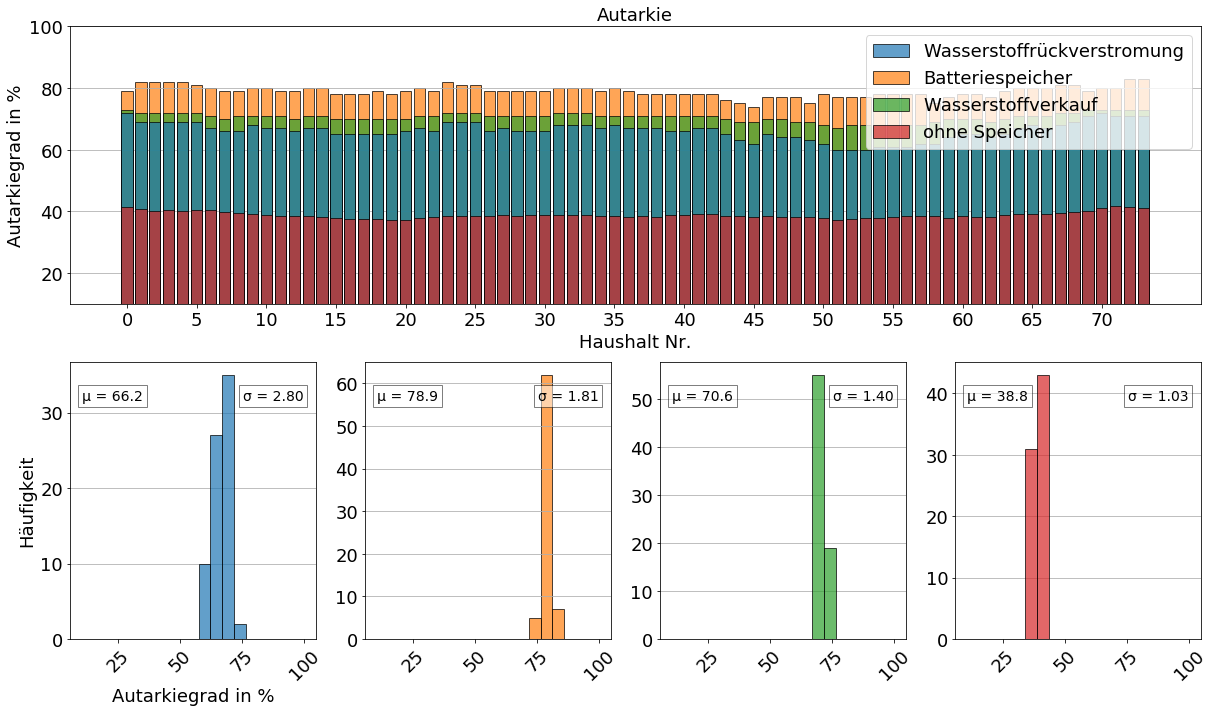

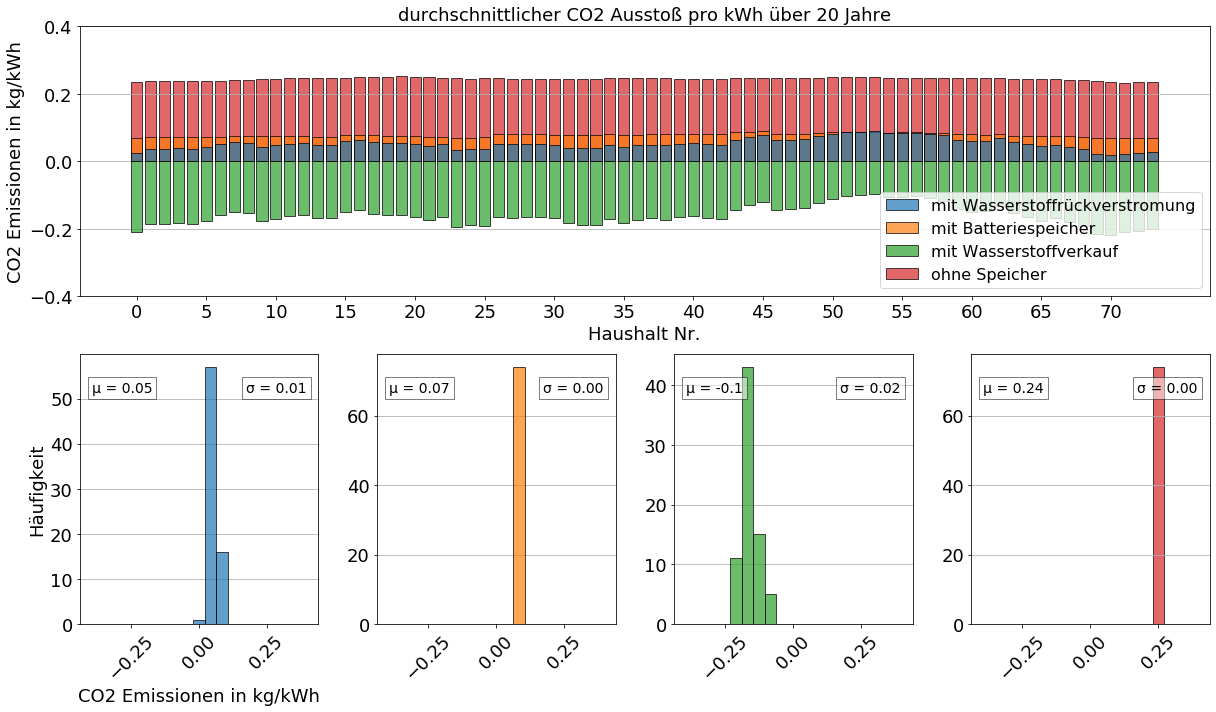

In [3]:
# Load
version=""""""
read_dictionary = np.load(directory_data+'simulation_'+file_extension+'_mode1.npy',allow_pickle='TRUE').item()

E_netz_jahr_list=read_dictionary['E_netz_jahr']
E_eigen_ohne_jahr_list=read_dictionary['E_eigen_ohne_jahr']
E_eigen_ohne_H0_jahr_list=read_dictionary['E_eigen_ohne_H0_jahr']
P_max_RFC_kosten_opt_list=read_dictionary['P_max_RFC_kosten_opt']
P_max_P2G_kosten_opt_list=read_dictionary['P_max_P2G_kosten_opt']
E_max_bat_kosten_opt_list=read_dictionary['E_max_bat_kosten_opt']
P_max_RFC_CO2_opt_list=read_dictionary['P_max_RFC_CO2_opt']
P_max_P2G_CO2_opt_list=read_dictionary['P_max_P2G_CO2_opt']
E_max_bat_CO2_opt_list=read_dictionary['E_max_bat_CO2_opt']
autarkie_RFC_kosten_opt_list=read_dictionary['autarkie_RFC_kosten_opt']
autarkie_P2G_kosten_opt_list=read_dictionary['autarkie_P2G_kosten_opt']
autarkie_bat_kosten_opt_list=read_dictionary['autarkie_bat_kosten_opt']
autarkie_RFC_CO2_opt_list=read_dictionary['autarkie_RFC_CO2_opt']
autarkie_P2G_CO2_opt_list=read_dictionary['autarkie_P2G_CO2_opt']
autarkie_bat_CO2_opt_list=read_dictionary['autarkie_bat_CO2_opt']
K_einspar_RFC_list=read_dictionary['K_einspar_RFC']
K_einspar_P2G_list=read_dictionary['K_einspar_P2G']
K_einspar_bat_list=read_dictionary['K_einspar_bat']
CO2prokWh_RFC_list=read_dictionary['CO2prokWh_RFC']
CO2prokWh_P2G_list=read_dictionary['CO2prokWh_P2G']
CO2prokWh_bat_list=read_dictionary['CO2prokWh_bat']
CO2prokWh_ohne_list=read_dictionary['CO2prokWh_ohne']
LastprofilNr=read_dictionary['LastprofilNr']

path = directory_output+'/Simulation_aufskaliert_Kennwerte/'+version

#Jahresverbrauch
E_jahresverbrauch=np.add(E_netz_jahr_list, E_eigen_ohne_jahr_list)
title= 'Jahresverbrauch'
lim=[20000,120000]
ax=vis.balkendiagramm(LastprofilNr,[E_jahresverbrauch,E_eigen_ohne_jahr_list,E_eigen_ohne_H0_jahr_list],lim,'Haushalt Nr.','Energie in kWh',title)
ax.legend(['Jahresverbrauch','Eigenstromanteil ohne Speicher','Eigenstromanteil bei H0-Profil'],loc='best', fontsize=vis.fontsize)
plt.savefig(path+'Jahresverbrauch_'+file_extension+'.png')
plt.tight_layout()
vis.save_to_tex('Diagramm_Jahresverbrauch_aufskaliert_vergleichSpeicher'+file_extension,ax)


#Optimalauslegung Wasserstoffrückverstromung
lim=[0,100000]
title='Wasserstoffrückverstromung Auslegung'
ax=vis.balkendiagramm(LastprofilNr,[P_max_RFC_kosten_opt_list,P_max_RFC_CO2_opt_list],lim,'Haushalt Nr.','Speicherleistung in W', title)
ax.legend(['wirtschaftliches Optimum','CO2 Optimum'],loc='best', fontsize=vis.fontsize)
plt.savefig(path+'Optimalauslegung_Wasserstoffrückverstromung_'+file_extension+'.png')
#Optimalauslegung Wasserstoffverkauf
lim=[0,180000]
title='Wasserstoffverkauf Auslegung'
ax=vis.balkendiagramm(LastprofilNr,[P_max_P2G_kosten_opt_list,P_max_P2G_CO2_opt_list],lim,'Haushalt Nr.','Elektrolyseurleistung in W', title)
ax.legend(['wirtschaftliches Optimum','CO2 Optimum'],loc='best', fontsize=vis.fontsize)
plt.savefig(path+'Optimalauslegung_Wasserstoffverkauf_'+file_extension+'.png')
#Optimalauslegung Batterie
lim=[0,300]
title='Batterieauslegung'
ax=vis.balkendiagramm(LastprofilNr,[E_max_bat_kosten_opt_list,E_max_bat_CO2_opt_list],lim,'Haushalt Nr.','Speicherkapazität in kWh',title)
ax.legend(['wirtschaftliches Optimum','CO2 Optimum'],loc='best', fontsize=vis.fontsize)
plt.savefig(path+'Optimalauslegung_Batterie_'+file_extension+'.png')


#Korrelation Wasserstoffrückverstromung
title='Optimale Wasserstoffrückverstromung Leistung Korrelation zu Jahresverbrauch'
ax=vis.plot_korrelation(E_jahresverbrauch,P_max_RFC_kosten_opt_list,'Jahresverbrauch in kWh','Leistung in W',title)
ax.plot(E_jahresverbrauch,P_max_RFC_CO2_opt_list,'go')
ax.legend(['wirtschaftliches Optimum','CO2 Optimum'],loc='best', fontsize=vis.fontsize)
ax.set_ylim(0,20000)
plt.tight_layout()
plt.savefig(path+'Korrelation_Wasserstoffrückverstromung_'+file_extension+'.png')
#Korrelation Wasserstoffverkauf
title='Optimale Elektrolyseurgröße für Wasserstoffverkauf Korrelation zu Jahresverbrauch'
ax=vis.plot_korrelation(E_jahresverbrauch,P_max_P2G_kosten_opt_list,'Jahresverbrauch in kWh','Leistung in W',title)
ax.plot(E_jahresverbrauch,P_max_P2G_CO2_opt_list,'go')
ax.legend(['wirtschaftliches Optimum','CO2 Optimum'],loc='best', fontsize=vis.fontsize)
plt.tight_layout()
plt.savefig(path+'Korrelation_Wasserstoffverkauf_'+file_extension+'.png')
#Korrelation Batterie
title='Optimale Batteriekapazität Korrelation zu Jahresverbrauch'
ax=vis.plot_korrelation(E_jahresverbrauch,E_max_bat_kosten_opt_list,'Jahresverbrauch in kWh','Batteriekapazität in kWh',title)
ax.plot(E_jahresverbrauch,E_max_bat_CO2_opt_list,'go')
ax.legend(['wirtschaftliches Optimum','CO2 Optimum'],loc='best', fontsize=vis.fontsize)
plt.tight_layout()
plt.savefig(path+'Korrelation_Batterie_'+file_extension+'.png')

#Wirtschaftlichkeit Vergleich
lim=[0,7000]
title='Wirtschaftlichkeit als Kosteneinsparung gegenüber Haushalt ohne Speicher'
ax=vis.balkendiagramm(LastprofilNr,[K_einspar_RFC_list,K_einspar_bat_list,K_einspar_P2G_list],lim,'Haushalt Nr.','Kosteneinsparung in €/a',title)
ax.legend(['Wasserstoffrückverstromung','Batteriespeicher','Wasserstoffverkauf'],loc='best', fontsize=vis.fontsize)
plt.savefig(path+'Wirtschaftlichkeit_Vergleich_'+file_extension+'ynorm.png')
vis.save_to_tex('Diagramm_wirtschaftlichkeit_aufskaliert_vergleichSpeicher'+file_extension,ax)


#Autarkiegrad
title='Autarkie'
lim=[10,100]
autarkie_ohne_speicher=100*np.array(E_eigen_ohne_jahr_list)/E_jahresverbrauch
ax=vis.balkendiagramm(LastprofilNr,[autarkie_RFC_kosten_opt_list,autarkie_bat_kosten_opt_list,autarkie_P2G_kosten_opt_list,autarkie_ohne_speicher],lim,'Haushalt Nr.','Autarkiegrad in %',title)
ax.legend(['Wasserstoffrückverstromung','Batteriespeicher','Wasserstoffverkauf','ohne Speicher'],loc='best', fontsize=vis.fontsize)
plt.savefig(path+'Autarkiegrad_'+file_extension+'.png')
vis.save_to_tex('Diagramm_autarkiegrad_aufskaliert_vergleichSpeicher'+file_extension,ax)


#Umwelteinfluss
title= 'durchschnittlicher CO2 Ausstoß pro kWh über 20 Jahre'
lim=[-0.4,0.4]
ax=vis.balkendiagramm(LastprofilNr,[CO2prokWh_RFC_list,CO2prokWh_bat_list,CO2prokWh_P2G_list,CO2prokWh_ohne_list],lim,'Haushalt Nr.', 'CO2 Emissionen in kg/kWh',title)
ax.legend(['mit Wasserstoffrückverstromung','mit Batteriespeicher','mit Wasserstoffverkauf','ohne Speicher'],loc='lower right', fontsize=vis.fontsize-2)
plt.savefig(path+'CO2_prokWh_'+file_extension+'.png')
vis.save_to_tex('Diagramm_umwelteinfluss_aufskaliert_vergleichSpeicher'+file_extension,ax)



## Verschiedene PV Größen

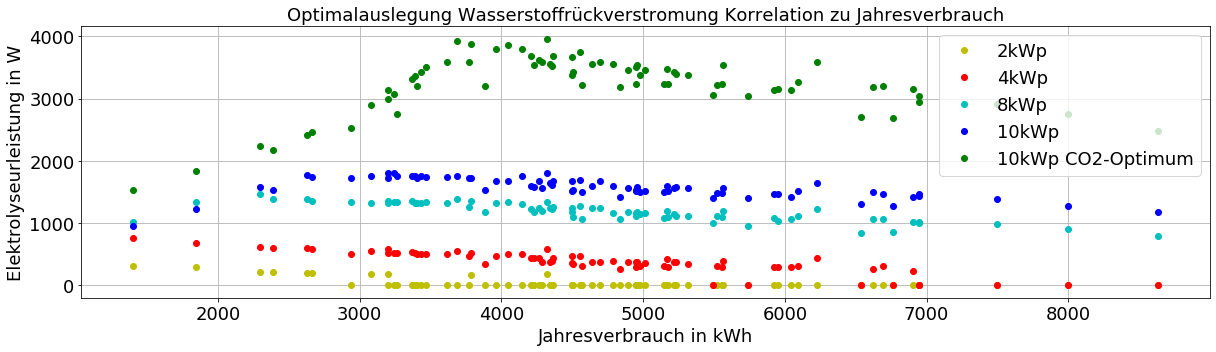

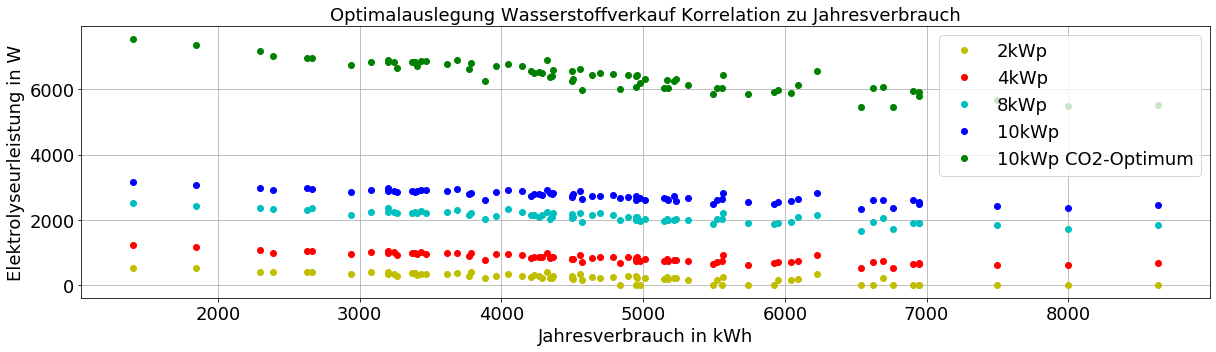

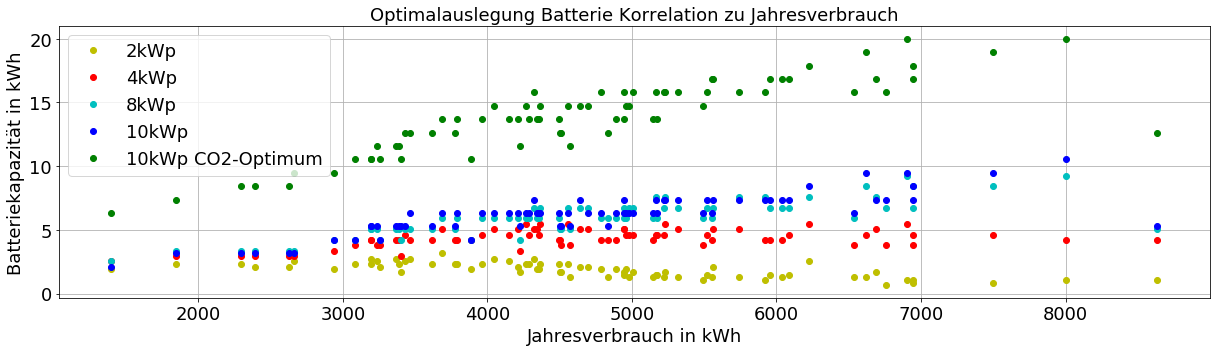

In [110]:
# Load
version=""""""
read_dictionary_2 = np.load(directory_data+'simulation_'+file_extension+'_mode2_2kWp.npy',allow_pickle='TRUE').item()
read_dictionary_4 = np.load(directory_data+'simulation_'+file_extension+'_mode2_4kWp.npy',allow_pickle='TRUE').item()
read_dictionary_8 = np.load(directory_data+'simulation_'+file_extension+'_mode2_8kWp.npy',allow_pickle='TRUE').item()
read_dictionary_10 = np.load(directory_data+'simulation_'+file_extension+'_mode2_10kWp.npy',allow_pickle='TRUE').item()
read_dictionary = np.load(directory_data+'simulation_'+file_extension+'_mode0.npy',allow_pickle='TRUE').item()
P_max_RFC_CO2_opt_list_=read_dictionary['P_max_RFC_CO2_opt']
P_max_P2G_CO2_opt_list_=read_dictionary['P_max_P2G_CO2_opt']
E_max_bat_CO2_opt_list_=read_dictionary['E_max_bat_CO2_opt']


E_netz_jahr_list_2=read_dictionary_2['E_netz_jahr']
E_eigen_ohne_jahr_list_2=read_dictionary_2['E_eigen_ohne_jahr']
E_eigen_ohne_H0_jahr_list_2=read_dictionary_2['E_eigen_ohne_H0_jahr']
P_max_RFC_kosten_opt_list_2=read_dictionary_2['P_max_RFC_kosten_opt']
P_max_P2G_kosten_opt_list_2=read_dictionary_2['P_max_P2G_kosten_opt']
E_max_bat_kosten_opt_list_2=read_dictionary_2['E_max_bat_kosten_opt']
P_max_RFC_CO2_opt_list_2=read_dictionary_2['P_max_RFC_CO2_opt']
P_max_P2G_CO2_opt_list_2=read_dictionary_2['P_max_P2G_CO2_opt']
E_max_bat_CO2_opt_list_2=read_dictionary_2['E_max_bat_CO2_opt']

P_max_RFC_kosten_opt_list_4=read_dictionary_4['P_max_RFC_kosten_opt']
P_max_P2G_kosten_opt_list_4=read_dictionary_4['P_max_P2G_kosten_opt']
E_max_bat_kosten_opt_list_4=read_dictionary_4['E_max_bat_kosten_opt']
P_max_RFC_CO2_opt_list_4=read_dictionary_4['P_max_RFC_CO2_opt']
P_max_P2G_CO2_opt_list_4=read_dictionary_4['P_max_P2G_CO2_opt']
E_max_bat_CO2_opt_list_4=read_dictionary_4['E_max_bat_CO2_opt']

P_max_RFC_kosten_opt_list_8=read_dictionary_8['P_max_RFC_kosten_opt']
P_max_P2G_kosten_opt_list_8=read_dictionary_8['P_max_P2G_kosten_opt']
E_max_bat_kosten_opt_list_8=read_dictionary_8['E_max_bat_kosten_opt']
P_max_RFC_CO2_opt_list_8=read_dictionary_8['P_max_RFC_CO2_opt']
P_max_P2G_CO2_opt_list_8=read_dictionary_8['P_max_P2G_CO2_opt']
E_max_bat_CO2_opt_list_8=read_dictionary_8['E_max_bat_CO2_opt']

P_max_RFC_kosten_opt_list_10=read_dictionary_10['P_max_RFC_kosten_opt']
P_max_P2G_kosten_opt_list_10=read_dictionary_10['P_max_P2G_kosten_opt']
E_max_bat_kosten_opt_list_10=read_dictionary_10['E_max_bat_kosten_opt']
P_max_RFC_CO2_opt_list_10=read_dictionary_10['P_max_RFC_CO2_opt']
P_max_P2G_CO2_opt_list_10=read_dictionary_10['P_max_P2G_CO2_opt']
E_max_bat_CO2_opt_list_10=read_dictionary_10['E_max_bat_CO2_opt']


path = directory_output+'/Simulation_PV_Dimensionierung/'+version

E_jahresverbrauch=np.add(E_netz_jahr_list_2,E_eigen_ohne_jahr_list_2)

#Korrelation Wasserstoffspeicher
title='Optimalauslegung Wasserstoffrückverstromung Korrelation zu Jahresverbrauch'
ax=vis.plot_korrelation(E_jahresverbrauch,P_max_RFC_kosten_opt_list_2,'Jahresverbrauch in kWh','Elektrolyseurleistung in W',title)
ax.plot(E_jahresverbrauch,P_max_RFC_kosten_opt_list_4,'ro')
ax.plot(E_jahresverbrauch,P_max_RFC_kosten_opt_list_8,'co')
ax.plot(E_jahresverbrauch,P_max_RFC_kosten_opt_list_10,'bo')
ax.plot(E_jahresverbrauch,P_max_RFC_CO2_opt_list_,'go')
ax.legend(['2kWp','4kWp','8kWp','10kWp','10kWp CO2-Optimum'],loc='best', fontsize=vis.fontsize)
plt.tight_layout()
plt.savefig(path+'Korrelation_Wasserstoffrueckverstromung_'+file_extension+'.png')
vis.save_to_tex('Diagramm_Korrelation_RFC_'+file_extension,ax)


#Korrelation Wasserstoffverkauf
title='Optimalauslegung Wasserstoffverkauf Korrelation zu Jahresverbrauch'
ax=vis.plot_korrelation(E_jahresverbrauch,P_max_P2G_kosten_opt_list_2,'Jahresverbrauch in kWh','Elektrolyseurleistung in W',title)
ax.plot(E_jahresverbrauch,P_max_P2G_kosten_opt_list_4,'ro')
ax.plot(E_jahresverbrauch,P_max_P2G_kosten_opt_list_8,'co')
ax.plot(E_jahresverbrauch,P_max_P2G_kosten_opt_list_10,'bo')
ax.plot(E_jahresverbrauch,P_max_P2G_CO2_opt_list_,'go')
ax.legend(['2kWp','4kWp','8kWp','10kWp','10kWp CO2-Optimum'],loc='best', fontsize=vis.fontsize)
plt.tight_layout()
plt.savefig(path+'Korrelation_Wasserstoffverkauf_'+file_extension+'.png')
vis.save_to_tex('Diagramm_Korrelation_P2G_'+file_extension,ax)

#Korrelation Batterie
title='Optimalauslegung Batterie Korrelation zu Jahresverbrauch'
ax=vis.plot_korrelation(E_jahresverbrauch,E_max_bat_kosten_opt_list_2,'Jahresverbrauch in kWh','Batteriekapazität in kWh',title)
ax.plot(E_jahresverbrauch,E_max_bat_kosten_opt_list_4,'ro')
ax.plot(E_jahresverbrauch,E_max_bat_kosten_opt_list_8,'co')
ax.plot(E_jahresverbrauch,E_max_bat_kosten_opt_list_10,'bo')
ax.plot(E_jahresverbrauch,E_max_bat_CO2_opt_list_,'go')
ax.legend(['2kWp','4kWp','8kWp','10kWp','10kWp CO2-Optimum'],loc='best', fontsize=vis.fontsize)
plt.tight_layout()
plt.savefig(path+'Korrelation_Batterie_'+file_extension+'.png')
vis.save_to_tex('Diagramm_Korrelation_Batterie_'+file_extension,ax)



## Auslegungsreglen

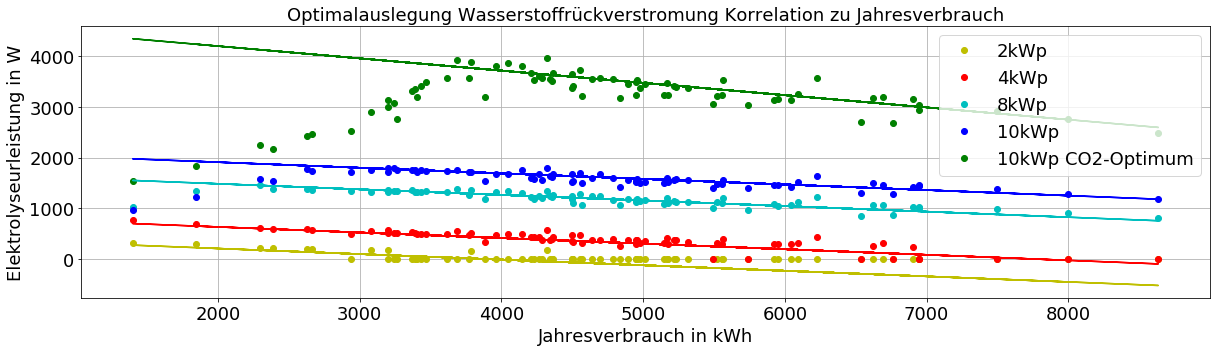

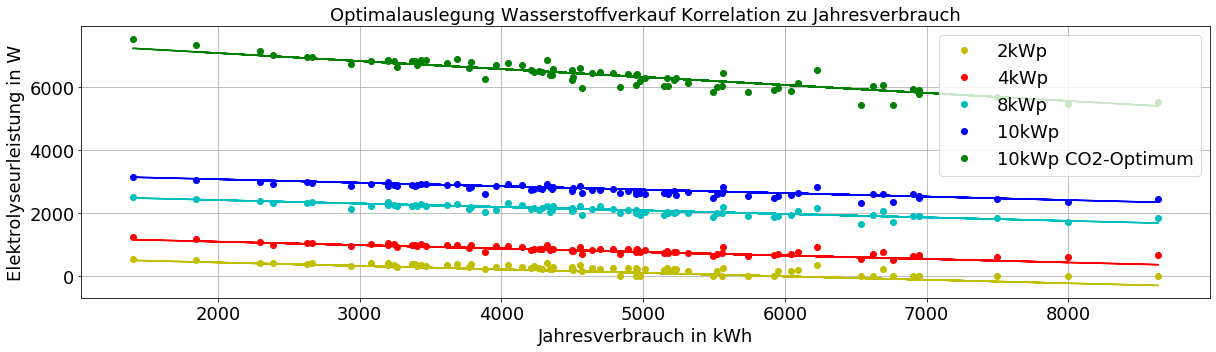

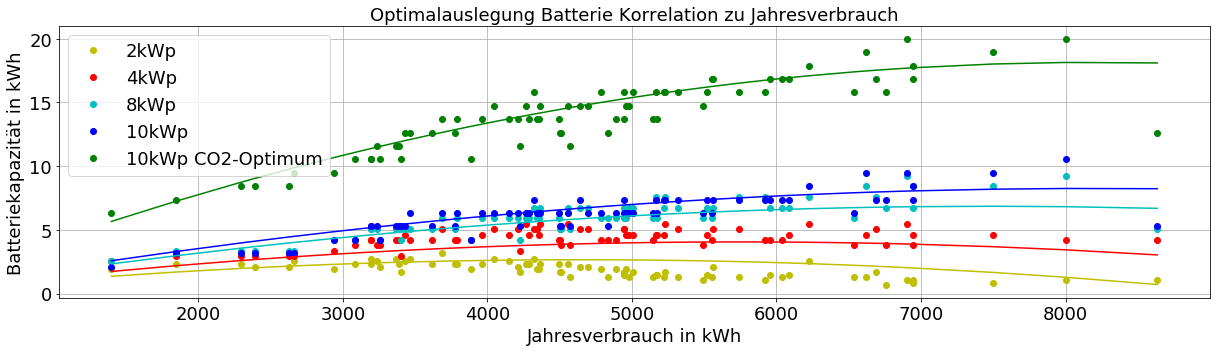

In [161]:
def auslegung_rfc(Jahresverbrauch, P_peak):
    return -0.11*Jahresverbrauch+213*P_peak

#Korrelation Wasserstoffspeicher
title='Optimalauslegung Wasserstoffrückverstromung Korrelation zu Jahresverbrauch'
ax=vis.plot_korrelation(E_jahresverbrauch,P_max_RFC_kosten_opt_list_2,'Jahresverbrauch in kWh','Elektrolyseurleistung in W',title)
ax.plot(E_jahresverbrauch,P_max_RFC_kosten_opt_list_4,'ro')
ax.plot(E_jahresverbrauch,P_max_RFC_kosten_opt_list_8,'co')
ax.plot(E_jahresverbrauch,P_max_RFC_kosten_opt_list_10,'bo')
ax.plot(E_jahresverbrauch,P_max_RFC_CO2_opt_list_,'go')
ax.plot(E_jahresverbrauch,auslegung_rfc(E_jahresverbrauch, 2),'y')
ax.plot(E_jahresverbrauch,auslegung_rfc(E_jahresverbrauch, 4),'r')
ax.plot(E_jahresverbrauch,auslegung_rfc(E_jahresverbrauch, 8),'c')
ax.plot(E_jahresverbrauch,auslegung_rfc(E_jahresverbrauch, 10),'b')
ax.plot(E_jahresverbrauch,auslegung_rfc(E_jahresverbrauch, 10)*2.2,'g')
ax.legend(['2kWp','4kWp','8kWp','10kWp','10kWp CO2-Optimum'],loc='best', fontsize=vis.fontsize)
plt.tight_layout()
plt.savefig(path+'Korrelation_Wasserstoffrueckverstromung_Auslegungsreglen_'+file_extension+'.png')
vis.save_to_tex('Diagramm_Korrelation_RFC_Auslegungsreglen_'+file_extension,ax)

def auslegung_P2G(Jahresverbrauch, P_peak):
    return -0.11*Jahresverbrauch+330*P_peak
#Korrelation Wasserstoffverkauf
title='Optimalauslegung Wasserstoffverkauf Korrelation zu Jahresverbrauch'
ax=vis.plot_korrelation(E_jahresverbrauch,P_max_P2G_kosten_opt_list_2,'Jahresverbrauch in kWh','Elektrolyseurleistung in W',title)
ax.plot(E_jahresverbrauch,P_max_P2G_kosten_opt_list_4,'ro')
ax.plot(E_jahresverbrauch,P_max_P2G_kosten_opt_list_8,'co')
ax.plot(E_jahresverbrauch,P_max_P2G_kosten_opt_list_10,'bo')
ax.plot(E_jahresverbrauch,P_max_P2G_CO2_opt_list_,'go')
ax.plot(E_jahresverbrauch,auslegung_P2G(E_jahresverbrauch, 2),'y')
ax.plot(E_jahresverbrauch,auslegung_P2G(E_jahresverbrauch, 4),'r')
ax.plot(E_jahresverbrauch,auslegung_P2G(E_jahresverbrauch, 8),'c')
ax.plot(E_jahresverbrauch,auslegung_P2G(E_jahresverbrauch, 10),'b')
ax.plot(E_jahresverbrauch,auslegung_P2G(E_jahresverbrauch, 10)*2.3,'g')
ax.legend(['2kWp','4kWp','8kWp','10kWp','10kWp CO2-Optimum'],loc='best', fontsize=vis.fontsize)
plt.tight_layout()
plt.savefig(path+'Korrelation_Wasserstoffverkauf_Auslegungsreglen_'+file_extension+'.png')
vis.save_to_tex('Diagramm_Korrelation_P2G_Auslegungsreglen_'+file_extension,ax)

import math
def auslegung_bat(Jahresverbrauch, P_peak):
    optimalauslegung=np.zeros(len(Jahresverbrauch))
    a=0.00035
    c=0.7
    d=1.25
    b=c*P_peak+d
    for i,value in enumerate(Jahresverbrauch):
        optimalauslegung[i]=-(a *value-math.sqrt(b))**2+b
    return optimalauslegung

#Korrelation Batterie
title='Optimalauslegung Batterie Korrelation zu Jahresverbrauch'
ax=vis.plot_korrelation(E_jahresverbrauch,E_max_bat_kosten_opt_list_2,'Jahresverbrauch in kWh','Batteriekapazität in kWh',title)
ax.plot(E_jahresverbrauch,E_max_bat_kosten_opt_list_4,'ro')
ax.plot(E_jahresverbrauch,E_max_bat_kosten_opt_list_8,'co')
ax.plot(E_jahresverbrauch,E_max_bat_kosten_opt_list_10,'bo')
ax.plot(E_jahresverbrauch,E_max_bat_CO2_opt_list_,'go')

E_jahresverbrauch_sort=np.sort(E_jahresverbrauch, axis=-1, kind='quicksort', order=None)
ax.plot(E_jahresverbrauch_sort,auslegung_bat(E_jahresverbrauch_sort, 2),'y')
ax.plot(E_jahresverbrauch_sort,auslegung_bat(E_jahresverbrauch_sort, 4),'r')
ax.plot(E_jahresverbrauch_sort,auslegung_bat(E_jahresverbrauch_sort, 8),'c')
ax.plot(E_jahresverbrauch_sort,auslegung_bat(E_jahresverbrauch_sort, 10),'b')
ax.plot(E_jahresverbrauch_sort,auslegung_bat(E_jahresverbrauch_sort, 10)*2.2,'g')

ax.legend(['2kWp','4kWp','8kWp','10kWp','10kWp CO2-Optimum'],loc='best', fontsize=vis.fontsize)
plt.tight_layout()
plt.savefig(path+'Korrelation_Batterie_Auslegungsreglen_'+file_extension+'.png')
vis.save_to_tex('Diagramm_Korrelation_Batterie_Auslegungsreglen_'+file_extension,ax)

## Elektrolyseur Sommerbetrieb+Batterie

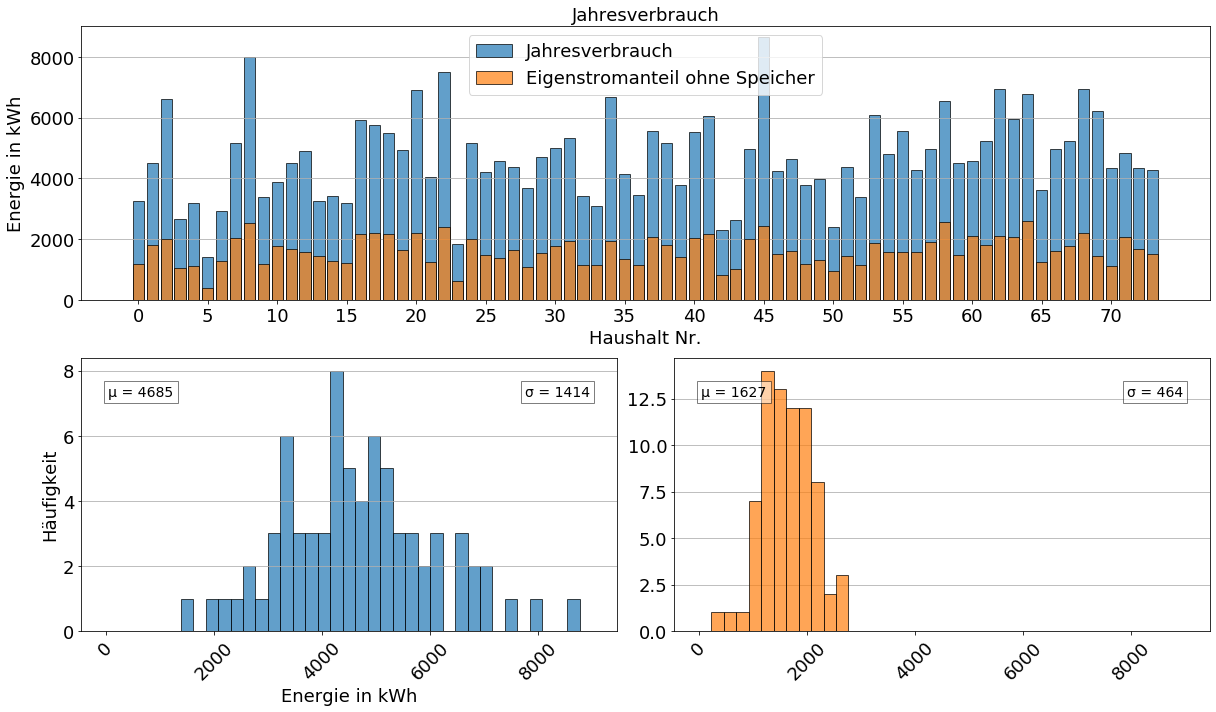

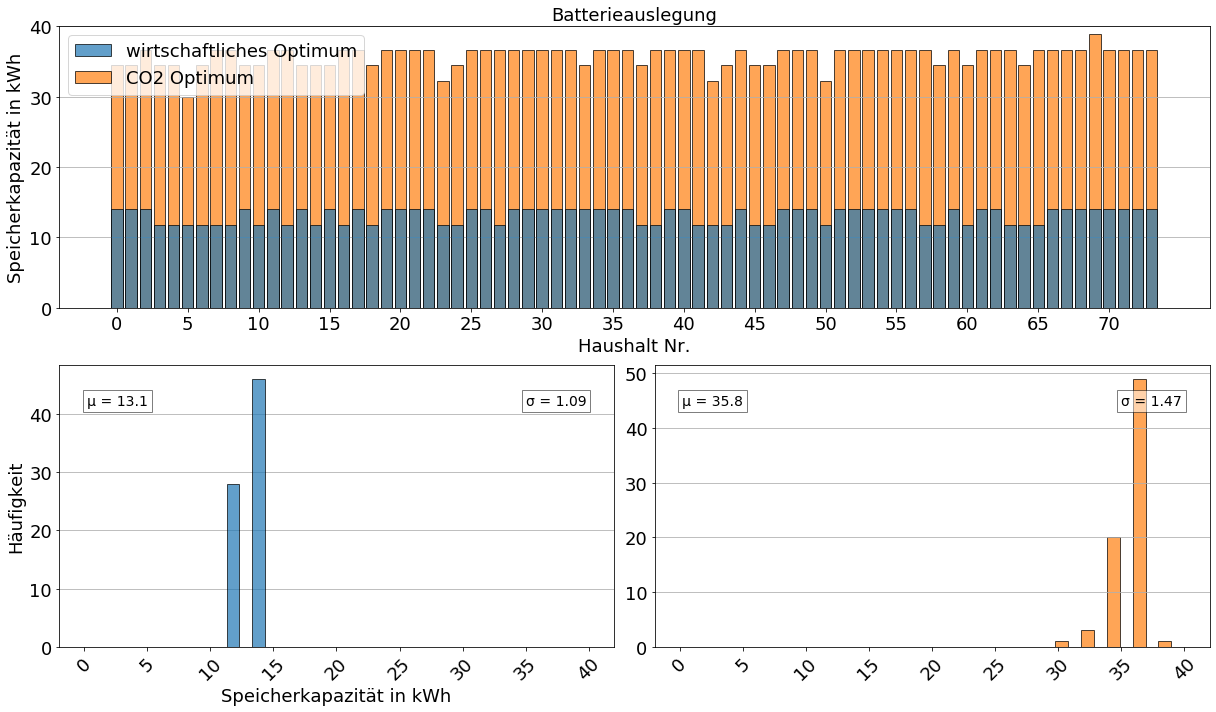

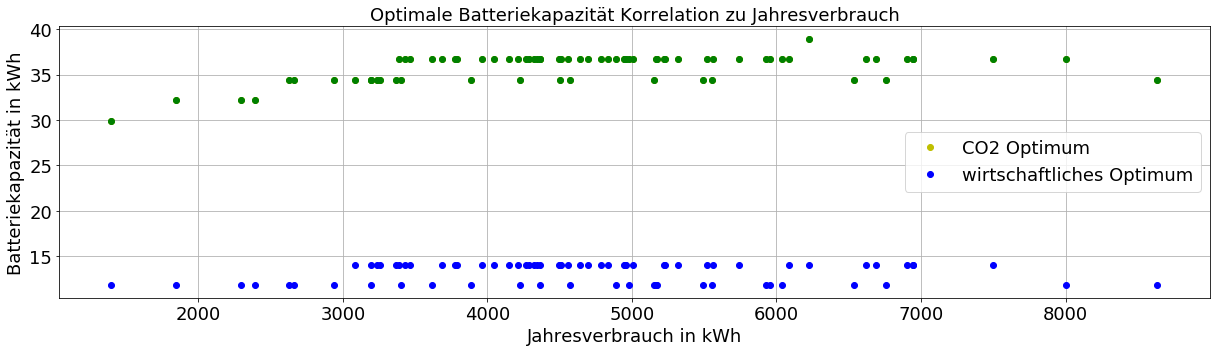

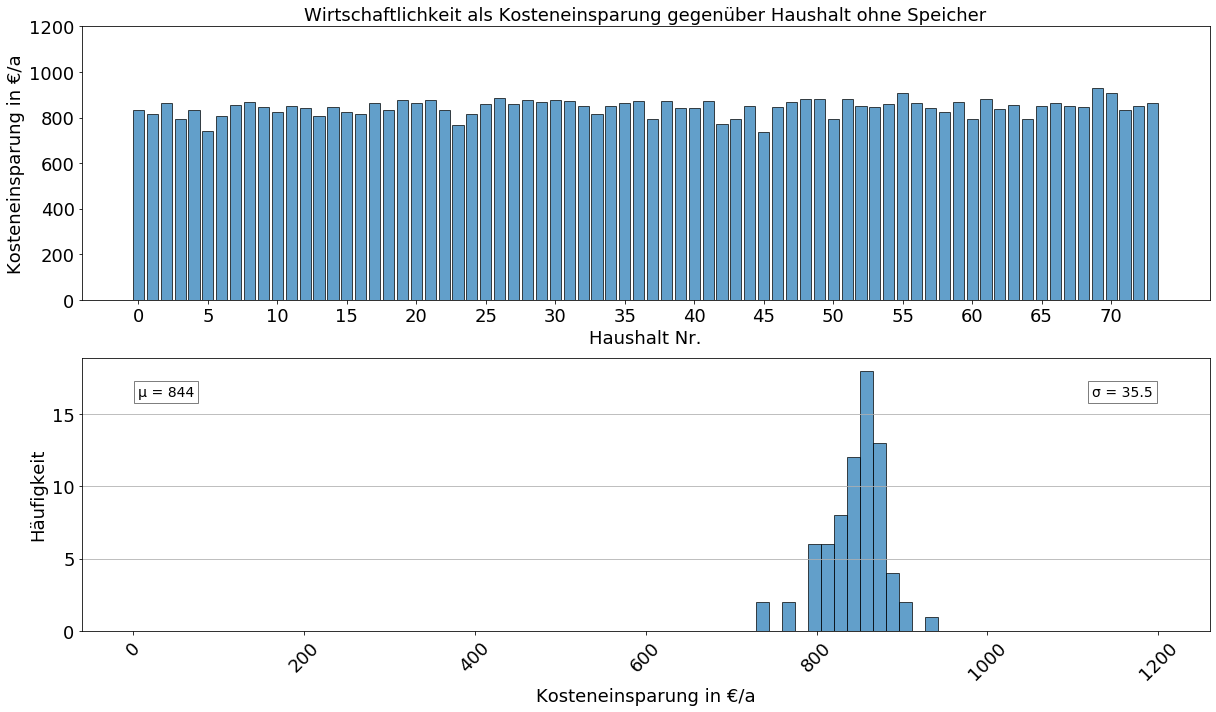

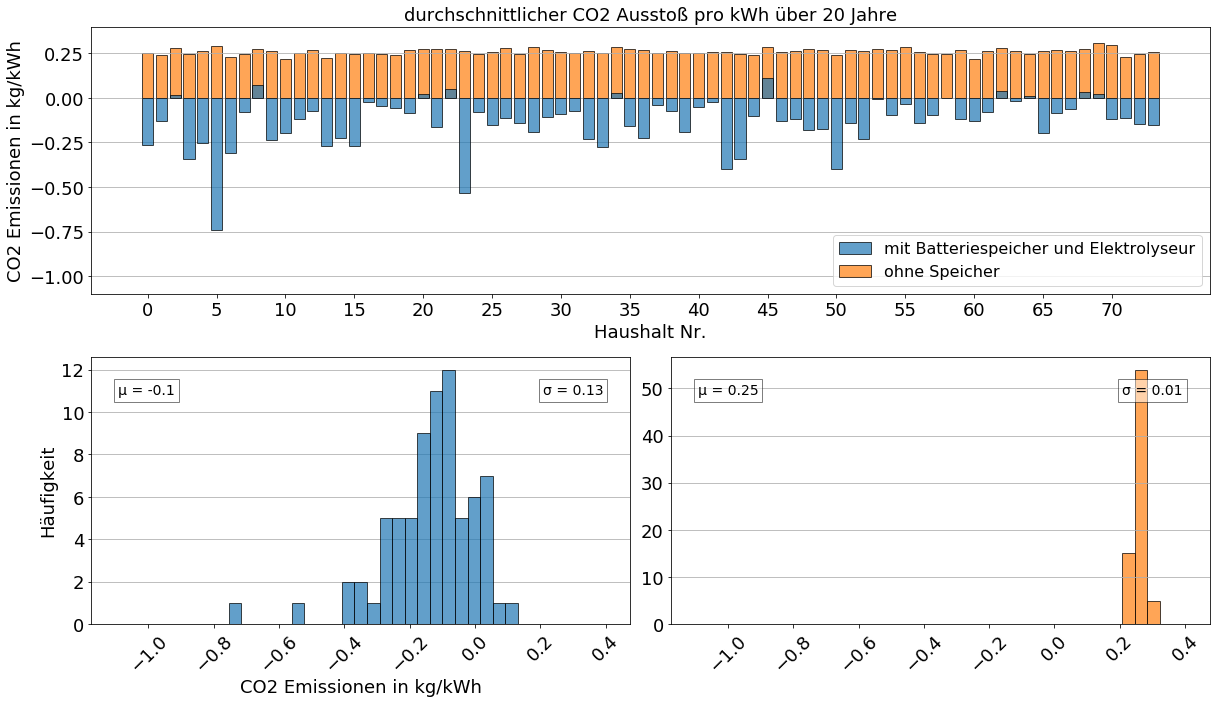

In [33]:
P_Elektrolyseur=800


directory_data=find_directory('_data')
# Load
if P_Elektrolyseur==400:
    version="""400W_"""
    read_dictionary = np.load(directory_data+'simulation_'+file_extension+'_mode3_400.npy',allow_pickle='TRUE').item()
else:
    if P_Elektrolyseur==800:
        version="""800W_"""
        read_dictionary = np.load(directory_data+'simulation_'+file_extension+'_mode3_800.npy',allow_pickle='TRUE').item()
    else:
        if P_Elektrolyseur==1000:
            version="""800W_"""
            read_dictionary = np.load(directory_data+'simulation_'+file_extension+'_mode3_1000.npy',allow_pickle='TRUE').item()
        else:
            print("keine Simulationsergebnisse vorhanden")

E_netz_jahr_list=read_dictionary['E_netz_jahr']
E_eigen_ohne_jahr_list=read_dictionary['E_eigen_ohne_jahr']
E_max_bat_kosten_opt_list=read_dictionary['E_max_bat_kosten_opt']
E_max_bat_CO2_opt_list=read_dictionary['E_max_bat_CO2_opt']
K_einspar_gesamt_list=read_dictionary['K_einspar_gesamt']
CO2prokWh_gesamt_list=read_dictionary['CO2prokWh_gesamt_list']
CO2prokWh_ohne_list=read_dictionary['CO2prokWh_ohne']
LastprofilNr=read_dictionary['LastprofilNr']


path = directory_output+'/Simulation_Elektrolyseur_Sommerbetrieb/'+version

#Jahresverbrauch
E_jahresverbrauch=np.add(E_netz_jahr_list, E_eigen_ohne_jahr_list)
title= 'Jahresverbrauch'
lim=[0,9000]
ax=vis.balkendiagramm(LastprofilNr,[E_jahresverbrauch,E_eigen_ohne_jahr_list],lim,'Haushalt Nr.','Energie in kWh',title)
ax.legend(['Jahresverbrauch','Eigenstromanteil ohne Speicher'],loc='best', fontsize=vis.fontsize)
plt.savefig(path+'Jahresverbrauch_'+file_extension+'.png')


#Optimalauslegung Batterie
lim=[0,40]
title='Batterieauslegung'
ax=vis.balkendiagramm(LastprofilNr,[E_max_bat_kosten_opt_list,E_max_bat_CO2_opt_list],lim,'Haushalt Nr.','Speicherkapazität in kWh',title)
ax.legend(['wirtschaftliches Optimum','CO2 Optimum'],loc='best', fontsize=vis.fontsize)
plt.savefig(path+'Optimalauslegung_Batterie_'+file_extension+'.png')


#Korrelation Batterie
title='Optimale Batteriekapazität Korrelation zu Jahresverbrauch'
ax=vis.plot_korrelation(E_jahresverbrauch,E_max_bat_CO2_opt_list ,'Jahresverbrauch in kWh','Batteriekapazität in kWh',title)
ax.plot(E_jahresverbrauch,E_max_bat_kosten_opt_list,'bo')
ax.plot(E_jahresverbrauch,E_max_bat_CO2_opt_list,'go')
ax.legend(['CO2 Optimum','wirtschaftliches Optimum'],loc='best', fontsize=vis.fontsize)
plt.savefig(path+'Korrelation_Batterie_'+file_extension+'.png')
vis.save_to_tex('Diagramm_korrelationAuslegung_elektrolyseurSommerbetrieb_'+file_extension,ax)


#Wirtschaftlichkeit
lim=[0,1200]
title='Wirtschaftlichkeit als Kosteneinsparung gegenüber Haushalt ohne Speicher'
ax=vis.balkendiagramm(LastprofilNr,[K_einspar_gesamt_list],lim,'Haushalt Nr.','Kosteneinsparung in €/a',title)
plt.savefig(path+'Wirtschaftlichkeit_'+file_extension+'ynorm.png')
vis.save_to_tex('Diagramm_wirtschaftlichkeit_elektrolyseurSommerbetrieb_'+file_extension,ax)

#Umwelteinfluss
title= 'durchschnittlicher CO2 Ausstoß pro kWh über 20 Jahre'
lim=[-1.1,0.4]
ax=vis.balkendiagramm(LastprofilNr,[CO2prokWh_gesamt_list,CO2prokWh_ohne_list],lim,'Haushalt Nr.', 'CO2 Emissionen in kg/kWh',title)
ax.legend(['mit Batteriespeicher und Elektrolyseur','ohne Speicher'],loc='lower right', fontsize=vis.fontsize-2)
plt.savefig(path+'CO2_prokWh_'+file_extension+'.png')
vis.save_to_tex('Diagramm_umwelteinfluss_elektrolyseurSommerbetrieb_'+file_extension,ax)
